# CA06: Customer Segmentation using K-Means Clustering

Objective: The aim of this assignment is to perform customer segmentation
using the K-Means clustering algorithm in order to better understand the
different types of customers in a given dataset.

# Task 1: EDA

In [1]:
#a
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#b
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#c
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
print(df.isnull().sum())
#No missing values in our dataset

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


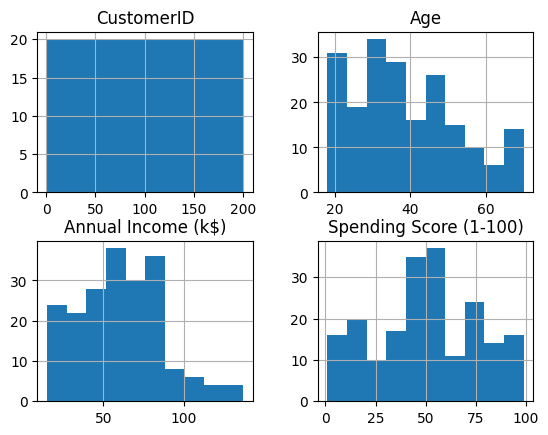

In [6]:
#d
df.hist() #Histograms of all of our featuers
plt.show()

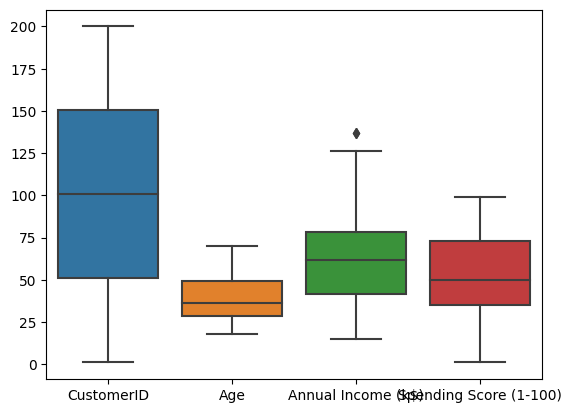

In [7]:
sns.boxplot(data=df)
plt.show() #Boxplot of all of our featuers

# Task 2: Prepare Data for Clustering

In [8]:
#a
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data
df_scaled = scaler.fit_transform(df.iloc[:,2:])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [9]:
#c
selected_features = df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']]
selected_features.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


Task 3: Implement k-means clustering

In [10]:
#a 
from sklearn.cluster import KMeans

In [11]:
#b
from sklearn.metrics import silhouette_score
range = range(2, 11)
silhouette_scores = []

for x in range:
    kmeans = KMeans(n_clusters=x, init='k-means++', n_init=10, max_iter=300, random_state=101)
    kmeans.fit(selected_features)
    score = silhouette_score(selected_features, kmeans.labels_)
    silhouette_scores.append(score)

k_num = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Optimal number of clusters: {k_num}")

Optimal number of clusters: 5


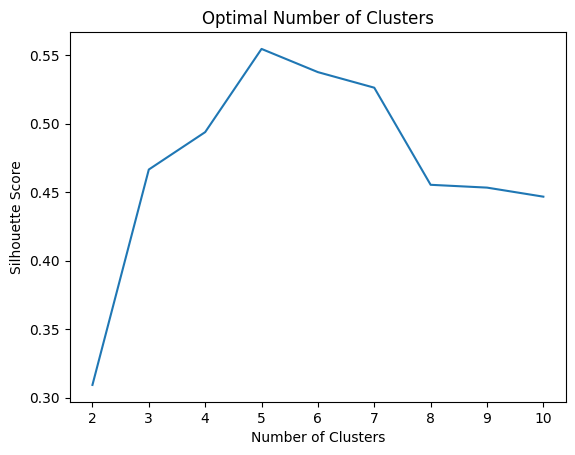

In [12]:
plt.plot(range, silhouette_scores)
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [13]:
#c
kmeans = KMeans(n_clusters=k_num, random_state=101, n_init=10)
kmeans.fit(selected_features)

KMeans(n_clusters=5, n_init=10, random_state=101)

In [14]:
#d
# get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# add the cluster assignments as a new column in the original DataFrame
selected_features['Cluster'] = cluster_assignments

In [15]:
selected_features.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4


# Task 4: Visualize and Analyze the Clusters

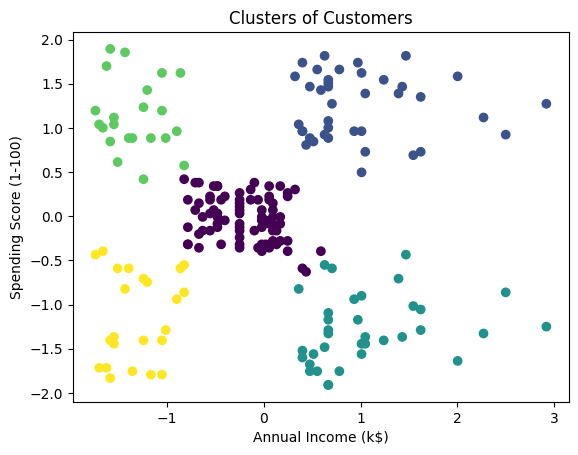

In [16]:
#a
plt.scatter(selected_features["Annual Income (k$)"], selected_features["Spending Score (1-100)"], c=selected_features["Cluster"], cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters of Customers")
plt.show()

b. 

Cluster 1: These customers have a high annual income and high spending score. They are likely to be high spenders and are a valuable target group for the mall.

Cluster 2: These customers have a low annual income and low spending score. They are likely to be low-income earners and not interested in spending much at the mall. They are not a priority target group for the mall.

Cluster 3: These customers have a high annual income but low spending score. They are likely to be careful with their spending and prefer to save their money. They might be interested in premium products or high-end stores.

Cluster 4: These customers have a low annual income but a high spending score. They are likely to be younger customers who are not earning a lot of money but are willing to spend it on shopping. They are an important target group for the mall as they have a high potential for growth.

Cluster 5: These customers have a moderate annual income and a moderate spending score. They are likely to be average spenders and might not have specific preferences when it comes to shopping. The mall can target them with general offers and promotions.

# Task 5: Summarize the Findings

a. Dataset Description:

The dataset used for this analysis contains information on the annual income and spending score of customers in a mall. It consists of 200 rows and 5 columns. All five of the variables in this dataset turned out to be categorical variables. The five were customer ID, gender, age, annual income, and spending score. 

b. Data Preprocessing, Feature Selection, and Scaling:

By looked at all of our data, first we realized there was no missing data, and therefore no need to fill or remove any records or features from our dataset. We than depicted all of the data by using bar charts to visualize all of the data to look for the trends in the dataset. Because of the previous visualizations, it was found to be beneficial to scale our data before processing. The features of Age, Annual Income and Spending Score were choosen to be scaled, while as Gender and ID did not need any scaling used on them because of their discrete nature. This was done by using the StandardScaler function from Scikit-learn. Then we selected the two features we wanted to perform an analysis on. It was chosen to use Annual Income and Spending Score as the two features to perform analysis one. This is because Annual Income represents the customers' financial capacity, which can represent ones purchasing power and overall value as a customer. Whereas Spending Score represents how much the customers spend, which can indicat their overall willingness to spend on certain products or services.

c. Determining the Optimal Number of Clusters:

From there we performed a cluster analysis by performing a KMeans analysis from the sklearn package. This was done by performing looking at the silhouette score to look at a measure of how well each data point fits into its assigned cluster compared to other clusters. The cluster number with the highest silhouette score was chosen as the optimal number of clusters. In this case, the highest silhouette score was achieved with 5 clusters as seen in the visualization plotted above.

d. Cluster Characteristics:

After running a KMeans analysis, it was found that five was the optimal number of clusters.

Cluster 1: Customers in this cluster have high annual incomes and high spending scores, indicating that they are high spenders in the mall.

Cluster 2: Customers in this cluster have moderate annual incomes and moderate spending scores, indicating that they are average spenders in the mall.

Cluster 3: Customers in this cluster have low annual incomes and high spending scores, indicating that they are high spenders in the mall, but have limited financial resources.

Cluster 4: Customers in this cluster have low annual incomes and low spending scores, indicating that they are low spenders in the mall, and have limited financial resources.

Cluster 5: Customers in this cluster have high annual incomes and low spending scores, indicating that they are low spenders in the mall, despite having high financial resources.

e. Insights and Recommendations:

The insights from this analysis can be used to create targeted marketing strategies for each cluster. For example, for customers in cluster 1, the mall could offer premium products and personalized services to keep them coming back. For customers in cluster 3, the mall could offer discounts and promotions to attract them to the mall. Additionally, the mall could focus on improving the shopping experience for customers in clusters 4 and 5, as they may have limited financial resources and need more incentives to visit the mall.